In [1]:
import pandas as pd
import os
from glob import glob
import platform
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import ast

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# pandas 전체 출력 형식 설정(지수 표기 -> 자연수 표기)
pd.set_option('display.float_format', '{:,.0f}'.format)

pd.set_option('display.max_columns',100) # pandas 내 모든 칼럼 표시
pd.set_option('display.max_rows', None) # pandas 내 모든 행 표시
pd.set_option('display.max_seq_items', None) # 출력 옵션 설정
pd.set_option('display.max_colwidth', None) # pandas 최대 열 너비 늘리기기

---
---
# 1. Hackle

## 1.1 device_properties

In [2]:
device_properties_df = pd.read_parquet('./data/hackle/device_properties.parquet')

In [3]:
device_properties_df.head() # 252,380 행, 4열

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple


In [4]:
device_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB


In [5]:
device_properties_df['id'].nunique()

252380

In [6]:
device_properties_df['device_vendor'].value_counts()

device_vendor
Apple            174444
samsung           75887
LGE                1578
Xiaomi              284
OnePlus              49
Google               31
LENOVO               24
Chinoe               19
FYD                   7
motorola              6
Lenovo                5
Nothing               4
Samsung               4
HUAWEI                3
Amazon                3
ZTE                   3
vivo                  3
blackshark            3
Sony                  2
APEX                  2
Teclast               2
incar                 2
asus                  2
Shanling              1
E-dong                1
IMUZ                  1
HXY                   1
Razer                 1
realme                1
Alldocube             1
Teclast_korea         1
bnd                   1
Digital               1
vsmart                1
Foxconn               1
iMUZ                  1
Name: count, dtype: int64

In [11]:
device_properties_df[device_properties_df['device_id'] == '00000716-27e9-4e72-a602-d0ce61784b06']

,id,device_id,device_model,device_vendor


In [12]:
%xdel device_properties_df

---
---
## 1.2 hackle_events

In [2]:
hackle_events_df = pd.read_parquet('./data/hackle/hackle_events.parquet')

In [3]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB


In [4]:
hackle_events_df.head()

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64,436,"4,830",NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26,174,"4,729",NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61,44,142,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119,545,"3,287",NaN


In [7]:
hackle_events_df['event_key'].unique()

array(['$session_start', 'click_question_open',
       'click_bottom_navigation_profile', 'view_shop',
       'click_bottom_navigation_lab', '$session_end', 'launch_app',
       'click_bottom_navigation_questions', 'view_lab_tap',
       'skip_question', 'view_questions_tap', 'view_timeline_tap',
       'click_bottom_navigation_timeline', 'click_notice_detail',
       'click_random_ask_shuffle', 'complete_question',
       'click_appbar_alarm_center', 'click_appbar_chat_rooms',
       'view_profile_tap', 'click_timeline_chat_start',
       'click_attendance', 'click_question_ask', 'click_question_share',
       'click_appbar_friend_plus', 'click_appbar_setting', 'view_login',
       'click_question_start', 'click_profile_ask', 'view_home_tap',
       'view_signup', 'click_random_ask_normal', 'click_purchase',
       'click_random_ask_other', 'complete_purchase',
       'click_copy_profile_link_profile', 'click_community_chat',
       'click_friend_invite', 'click_invite_friend', 'compl

In [3]:
hackle_events_df.sort_values(by='event_datetime')['event_key'].tolist()

['click_appbar_chat_rooms',
 'click_bottom_navigation_questions',
 'view_lab_tap',
 '$session_start',
 'click_question_ask',
 '$session_end',
 'click_bottom_navigation_profile',
 'click_question_open',
 'click_bottom_navigation_questions',
 'launch_app',
 'skip_question',
 'launch_app',
 'click_question_open',
 '$session_end',
 'click_question_start',
 'click_attendance',
 'launch_app',
 'launch_app',
 'click_question_start',
 'click_appbar_alarm_center',
 'click_question_open',
 'click_bottom_navigation_lab',
 'click_bottom_navigation_profile',
 '$session_end',
 'click_question_open',
 'click_question_open',
 '$session_start',
 'view_lab_tap',
 'click_question_open',
 'view_lab_tap',
 'launch_app',
 'click_bottom_navigation_profile',
 'click_appbar_chat_rooms',
 'skip_question',
 'click_bottom_navigation_profile',
 'view_lab_tap',
 'click_attendance',
 'click_question_open',
 'click_question_open',
 'skip_question',
 'view_lab_tap',
 '$session_end',
 'view_lab_tap',
 'launch_app',
 'c

In [7]:
user_flow = (
    hackle_events_df[hackle_events_df['session_id'] == 'XVYNT6zfhFWqIg9omwg2AHDjTLx2']
    .sort_values(by='event_datetime')
    ['event_key']
    .tolist()
)

user_flow

['launch_app',
 '$session_start',
 'click_appbar_alarm_center',
 'click_notice_detail',
 'click_question_start',
 'skip_question',
 'skip_question',
 'skip_question',
 'complete_question',
 'click_bottom_navigation_questions',
 'click_appbar_alarm_center',
 'click_bottom_navigation_profile',
 'view_timeline_tap',
 'view_profile_tap',
 'view_lab_tap',
 'click_bottom_navigation_profile',
 'view_lab_tap',
 'view_questions_tap',
 'click_bottom_navigation_questions',
 'view_timeline_tap',
 'click_appbar_alarm_center',
 'click_appbar_chat_rooms',
 'click_appbar_alarm_center',
 'click_question_open',
 'view_timeline_tap',
 'view_lab_tap',
 'click_bottom_navigation_profile',
 'view_profile_tap',
 'click_question_ask',
 'click_bottom_navigation_lab',
 'view_lab_tap',
 'view_questions_tap',
 'view_timeline_tap',
 'click_bottom_navigation_questions',
 'view_timeline_tap',
 'click_bottom_navigation_timeline',
 'click_bottom_navigation_profile',
 'view_profile_tap',
 'view_lab_tap',
 'view_lab_tap'

In [5]:
print("friend_count NaN 개수 :", hackle_events_df['friend_count'].isna().sum())
print("votes_count NaN 개수 :", hackle_events_df['votes_count'].isna().sum())
print("heart_balance NaN 개수 :", hackle_events_df['heart_balance'].isna().sum())
print("question_id NaN 개수 :", hackle_events_df['question_id'].isna().sum())

friend_count NaN 개수 : 752556
votes_count NaN 개수 : 754554
heart_balance NaN 개수 : 728643
question_id NaN 개수 : 10991835


In [6]:
hackle_events_df.describe()

,event_datetime,friend_count,votes_count,heart_balance,question_id
count,11441319,"10,688,763","10,686,765","10,712,676","449,484"
mean,2023-07-29 01:58:17.236000,54,257,"16,269","2,766"
min,2023-07-18 00:00:00,0,0,0,99
25%,2023-07-22 21:31:17,32,97,434,"1,393"
50%,2023-07-28 17:08:58,49,210,"1,249","2,569"
75%,2023-08-04 17:59:10,71,362,"3,188","4,459"
max,2023-08-10 23:59:59,"1,365","3,017","884,999,804","5,133"
std,NaN,34,218,"3,317,340","1,600"


In [8]:
hackle_events_df['event_id'].nunique()

11441319

In [9]:
hackle_events_df['id'].nunique()

11441319

In [10]:
hackle_events_df['session_id'].nunique()

253616

In [11]:
hackle_events_df['session_id'].duplicated().sum()

11187703

In [12]:
hackle_events_df['event_key'].value_counts().head(20)

event_key
view_lab_tap                         1266665
view_timeline_tap                    1194508
$session_start                       1036852
launch_app                            986388
click_question_open                   816801
click_bottom_navigation_questions     769163
click_bottom_navigation_profile       653507
$session_end                          649658
click_bottom_navigation_timeline      536051
skip_question                         454981
click_bottom_navigation_lab           453683
view_profile_tap                      413294
view_questions_tap                    353400
click_appbar_alarm_center             253541
click_notice_detail                   229358
click_question_start                  220385
click_random_ask_shuffle              184217
click_attendance                      157737
complete_question                     154105
click_appbar_chat_rooms               148422
Name: count, dtype: int64

In [13]:
# 이벤트 발생 상위 10개
top10_events = hackle_events_df['event_key'].value_counts().head(10).index.tolist()
# hour 컬럼 생성
hackle_events_df['hour'] = hackle_events_df['event_datetime'].dt.hour
# 상위 10개 이벤트만 필터링
top10_df = hackle_events_df[hackle_events_df['event_key'].isin(top10_events)]

In [14]:
# 시간대별 발생횟수
hourly_distribution = top10_df.groupby(['event_key', 'hour'])['event_id'].count().reset_index()
hourly_distribution = hourly_distribution.pivot(index='hour', columns='event_key', values='event_id').fillna(0)

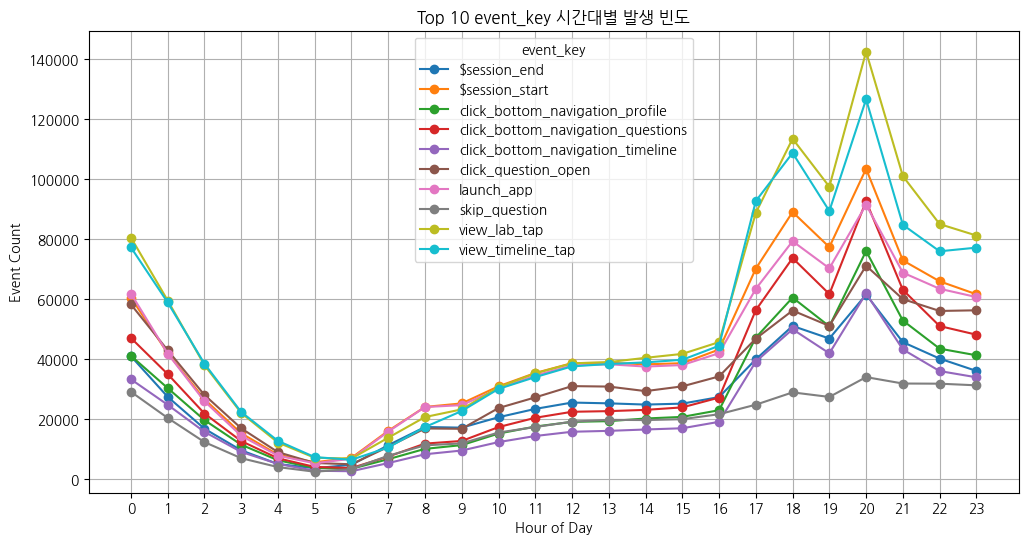

In [ ]:
hourly_distribution.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Top 10 event_key 시간대별 발생 빈도')
plt.xlabel('Hour of Day')
plt.ylabel('Event Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='event_key')
plt.show()

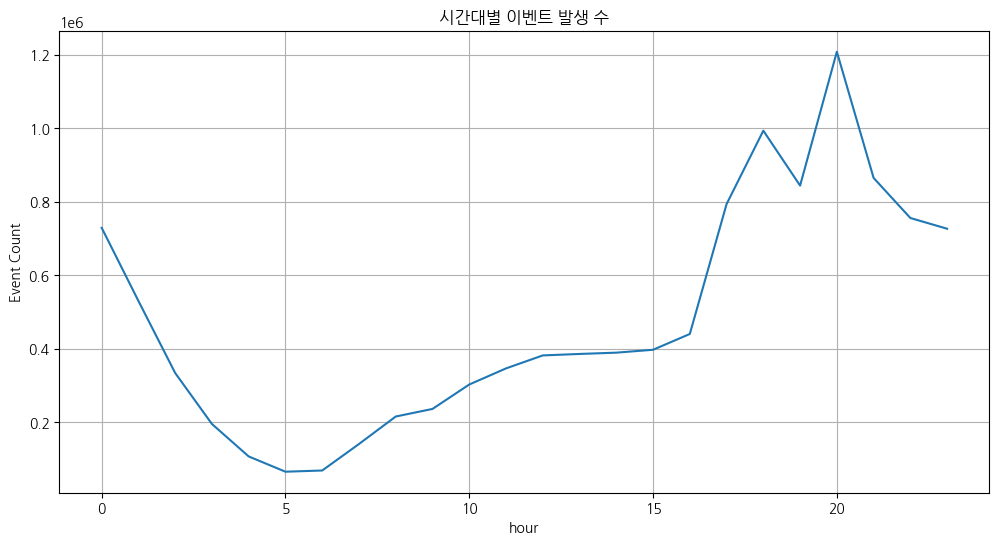

In [16]:
hourly_counts = hackle_events_df.groupby('hour')['event_id'].count()

hourly_counts.plot(figsize=(12, 6), title='시간대별 이벤트 발생 수')
plt.xlabel('hour')
plt.ylabel('Event Count')
plt.grid(True)
plt.show()

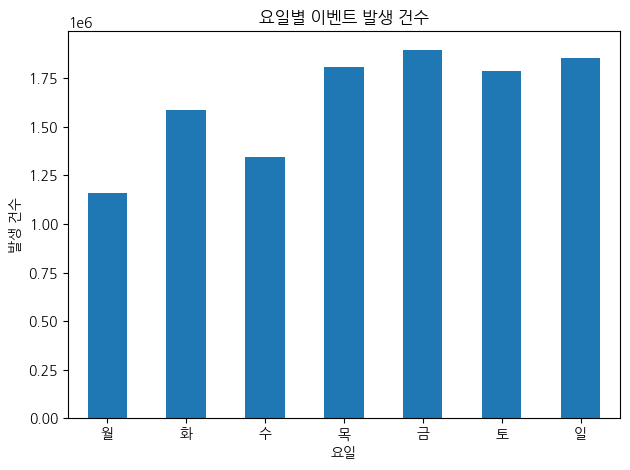

In [17]:
weekday_map = {
    'Monday': '월', 'Tuesday': '화', 'Wednesday': '수',
    'Thursday': '목', 'Friday': '금', 'Saturday': '토', 'Sunday': '일'
}

hackle_events_df['weekday'] = hackle_events_df['event_datetime'].dt.day_name()
hackle_events_df['weekday_kr'] = hackle_events_df['weekday'].map(weekday_map)

weekday_counts = hackle_events_df['weekday_kr'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'])

weekday_counts.plot(kind='bar')
plt.title("요일별 이벤트 발생 건수")
plt.xlabel("요일")
plt.ylabel("발생 건수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
(hackle_events_df['friend_count'] >= 1000).sum()

63

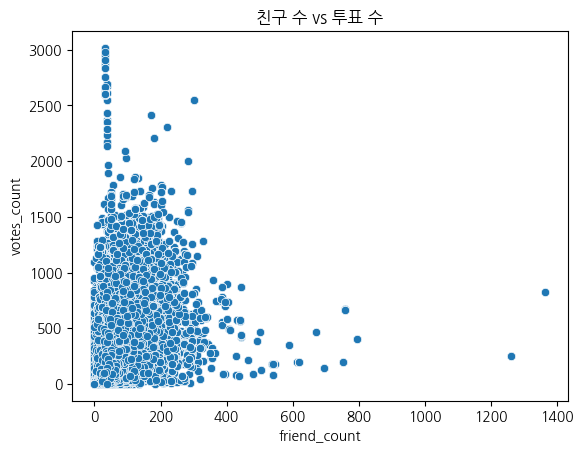

In [19]:
sns.scatterplot(data=hackle_events_df, x='friend_count', y='votes_count')
plt.title('친구 수 vs 투표 수')
plt.show()

In [20]:
hackle_events_df['page_name'].value_counts()

page_name
           10652540
home         518348
notice       229358
profile       14627
학년선택          10714
반선택            8592
학교선택           1904
번호인증           1246
아이디입력          1072
성별선택           1057
프사설정           1020
invite          816
이름입력             25
Name: count, dtype: int64

In [21]:
# 페이지 이름 별로 어떤 이벤트가 얼마나 발생했는지지
page_event = hackle_events_df.groupby('page_name')['event_key'].value_counts().unstack().fillna(0)

In [22]:
page_event

event_key,$session_end,$session_start,button,click_appbar_alarm_center,click_appbar_chat_rooms,click_appbar_friend_plus,click_appbar_setting,click_attendance,click_autoadd_contact,click_bottom_navigation_lab,click_bottom_navigation_profile,click_bottom_navigation_questions,click_bottom_navigation_timeline,click_community_chat,click_copy_profile_link_ask,click_copy_profile_link_profile,click_friend_invite,click_invite_friend,click_notice,click_notice_detail,click_profile_ask,click_purchase,click_question_ask,click_question_open,click_question_share,click_question_start,click_random_ask_normal,click_random_ask_other,click_random_ask_shuffle,click_timeline_chat_start,complete_purchase,complete_question,complete_signup,launch_app,skip_question,view_friendplus_tap,view_home_tap,view_lab_tap,view_login,view_profile_tap,view_questions_tap,view_shop,view_signup,view_timeline_tap
page_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,"649,658","1,036,852",428,"253,541","148,422","49,545","26,685",0,918,"453,683","653,507","769,163","536,051","1,335",40,"1,703",0,0,0,0,0,"13,039",0,"816,801","69,241",0,"18,653","11,075","184,217","50,186","2,201","154,105",974,"986,388","454,981",7,"5,392","1,266,665","49,275","413,294","353,400","26,607",0,"1,194,508"
home,0,0,0,0,0,0,0,"157,737",0,0,0,0,0,0,0,0,"3,221",238,1,0,0,0,"136,766",0,0,"220,385",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
invite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
notice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"229,358",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
profile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"14,627",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
반선택,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,592",0
번호인증,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,246",0
성별선택,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,057",0
아이디입력,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,072",0


In [23]:
%xdel page_event

In [24]:
# 세션 당 이벤트 수 기술통계량
session_event_count = hackle_events_df.groupby('session_id')['event_id'].count()
print(session_event_count.describe())

count   253,616
mean         45
std         116
min           1
25%          10
50%          22
75%          45
max       8,157
Name: event_id, dtype: float64


In [25]:
%xdel session_event_count

In [45]:
session_sequence = hackle_events_df.sort_values(['session_id', 'event_datetime'])
session_sequence = session_sequence.groupby('session_id')['event_key'].apply(list)
print(session_sequence.head())

session_id
000137bc-80de-4bb5-b61d-df7f217a4501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [46]:
# 조건을 만족하는 세션만 필터링
target_sessions = session_sequence[
    session_sequence.apply(lambda x: len(x) >= 2 and x[0] == 'launch_app' and x[-1] == '$session_end')
]

# 결과 확인
print(f"조건을 만족하는 세션 수: {len(target_sessions)}")
print(target_sessions.head())

조건을 만족하는 세션 수: 1716
session_id
003CAFAF-DF37-44A7-AD24-EFFC9980E77F                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [50]:
# 조건을 만족하는 세션만 필터링
target_sessions = session_sequence[
    session_sequence.apply(lambda x: len(x) >= 2 and x[0] == '$session_start' and x[-1] == '$session_end')
]

# 결과 확인
print(f"조건을 만족하는 세션 수: {len(target_sessions)}")
print(target_sessions.head())

조건을 만족하는 세션 수: 2075
session_id
00132348-2ae9-4622-96ab-eabca19e1899                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [30]:
# 전처리 : heart_balance 정수형으로 변환

hackle_events_df['heart_balance'] = pd.to_numeric(
    hackle_events_df['heart_balance'].astype(str).str.replace(',', ''),
    errors='coerce'
)

In [37]:
# 유저 그룹 나누기 (예: 하트 잔고 상/하위 30%)
low_heart = hackle_events_df[hackle_events_df['heart_balance'] < hackle_events_df['heart_balance'].quantile(0.3)]
high_heart = hackle_events_df[hackle_events_df['heart_balance'] > hackle_events_df['heart_balance'].quantile(0.7)]

low_event = low_heart['event_key'].value_counts().head(10)
high_event = high_heart['event_key'].value_counts().head(10)

print("Low Heart 상위 이벤트:\n", low_event)
print("\nHigh Heart 상위 이벤트:\n", high_event)

Low Heart 상위 이벤트:
 event_key
view_lab_tap                         385227
view_timeline_tap                    363734
click_question_open                  261975
click_bottom_navigation_questions    237982
launch_app                           225104
$session_start                       201625
click_bottom_navigation_profile      201326
click_bottom_navigation_timeline     158939
$session_end                         137661
click_bottom_navigation_lab          132806
Name: count, dtype: int64

High Heart 상위 이벤트:
 event_key
view_lab_tap                         360464
view_timeline_tap                    344098
launch_app                           266552
$session_start                       239032
click_question_open                  211057
click_bottom_navigation_questions    202000
click_bottom_navigation_profile      178160
$session_end                         170601
skip_question                        165059
click_bottom_navigation_timeline     154298
Name: count, dtype: int64


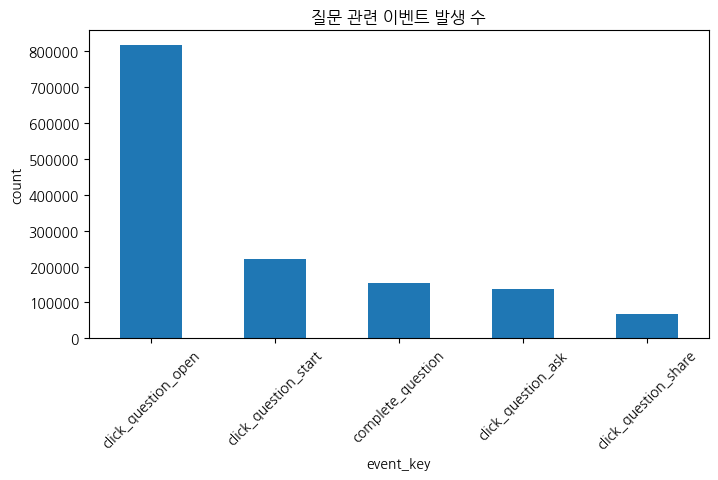

In [38]:
# 질문 관련 이벤트 필터링링
question_events = [
    'click_question_ask',
    'click_question_open',
    'click_question_share',
    'click_question_start',
    'complete_question'
]

question_df = hackle_events_df[hackle_events_df['event_key'].isin(question_events)]

question_df['event_key'].value_counts().plot(kind='bar', title='질문 관련 이벤트 발생 수', figsize=(8, 4))
plt.xlabel('event_key')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
%xdel hackle_events_df
%xdel question_df
%xdel target_sessions

: 

가장 session이 긴 id
- 008DAA55-8DF3-4405-9E11-D4A95E76825C

---
---
## 1.3 hackle_properties

In [5]:
hackle_properties_df = pd.read_parquet('./data/hackle/hackle_properties.parquet')

In [6]:
hackle_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [ ]:
hackle_properties_df.head()
# session_id와 device_id가 같은 게 있고 다른 게 있다.

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


In [ ]:
# session이 가장 긴 id의 정보
hackle_properties_df[hackle_properties_df['session_id'] == '008DAA55-8DF3-4405-9E11-D4A95E76825C']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
999,1000,008DAA55-8DF3-4405-9E11-D4A95E76825C,1578781,ko-KR,iOS,16.5.1,2.0.5,008DAA55-8DF3-4405-9E11-D4A95E76825C
18826,18827,008DAA55-8DF3-4405-9E11-D4A95E76825C,1578781,ko-KR,iOS,16.6,2.0.5,008DAA55-8DF3-4405-9E11-D4A95E76825C
40575,40576,008DAA55-8DF3-4405-9E11-D4A95E76825C,1578781,ko-KR,iOS,16.5.1,2.0.3,008DAA55-8DF3-4405-9E11-D4A95E76825C


In [9]:
hackle_properties_df['user_id'].nunique()

327381

In [10]:
hackle_properties_df['user_id'].duplicated().sum()

197969

In [13]:
hackle_properties_df['user_id'].value_counts().head()

user_id
           82255
1578652       17
1459833       13
1571506       13
1239584       12
Name: count, dtype: int64

In [15]:
hackle_properties_df['language'].value_counts().head(10)

language
ko-KR    340900
ko       164682
en-KR      9658
ko-US      4931
en         1122
en-GB       513
en-US       502
ko-JP       465
ko-CA       330
ja-KR       306
Name: count, dtype: int64

In [16]:
hackle_properties_df['osname'].value_counts()

osname
iOS        359479
Android    165871
Name: count, dtype: int64

In [17]:
hackle_properties_df['versionname'].value_counts()

versionname
2.0.5     309644
2.0.3     157957
2.0.0      39630
1.2.16      7847
1.2.15      7495
1.2.19      2386
1.2.10       293
1.2.8         62
2.0.4         25
1.2.4          3
1.2.1          2
1.2.5          2
1.2.9          1
1.0.0          1
1.2.3          1
2.0.2          1
Name: count, dtype: int64

In [19]:
%xdel hackle_properties_df

---
---
## 1.4 user_properties

In [18]:
user_properties_df = pd.read_parquet('./data/hackle/user_properties.parquet')

In [20]:
user_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


In [21]:
user_properties_df.head()

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078


In [22]:
user_properties_df['gender'].value_counts()

gender
F    132610
M     98209
Name: count, dtype: int64

In [24]:
print('class 유니크 개수 :', user_properties_df['class'].nunique())
print('grade 유니크 개수 :', user_properties_df['grade'].nunique())

class 유니크 개수 : 20
grade 유니크 개수 : 3


In [25]:
%xdel user_properties_df